<a href="https://colab.research.google.com/github/s1230038/autoencoder/blob/master/autoencoder_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
# adding https://gertjanvandenburg.com/blog/autoencoder/
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras import backend as K

# adding https://gertjanvandenburg.com/blog/autoencoder/
input_img = Input(shape=(28*28,))
l1 = Dense(50, activation='tanh')(input_img)
l2 = Dense(50, activation='tanh')(l1)
l3 = Dense(2, activation='linear')(l2)
l4 = Dense(50, activation='tanh')(l3)
l5 = Dense(50, activation='tanh')(l4)
out = Dense(28*28, activation='relu')(l5)
autoencoder = Model(inputs=input_img, outputs=out)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255. # 画像データは0から1の値を取るように規格化
x_test = x_test.astype('float32') / 255.
# x_trainは (60000, 28, 28) という形をしていますが、784次元の入力になるように (60000, 784) に変形
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                nb_epoch=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 43us/step - loss: 0.0672 - acc: 0.0075 - val_loss: 0.0585 - val_acc: 0.0113
Epoch 2/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0558 - acc: 0.0125 - val_loss: 0.0536 - val_acc: 0.0118
Epoch 3/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0522 - acc: 0.0114 - val_loss: 0.0502 - val_acc: 0.0126
Epoch 4/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0493 - acc: 0.0134 - val_loss: 0.0482 - val_acc: 0.0141
Epoch 5/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0475 - acc: 0.0118 - val_loss: 0.0467 - val_acc: 0.0101
Epoch 6/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0462 - acc: 0.0110 - val_loss: 0.0455 - val_acc: 0.0081
Epoch 7/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0451 - acc: 0.0104 - val_loss: 0.0445 - 

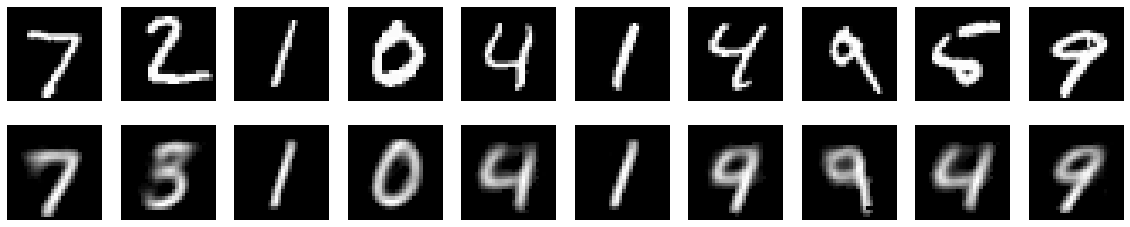

In [0]:
import matplotlib.pyplot as plt

# 学習した重みを保存したり、読み込みたい場合
autoencoder.save_weights('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from google.colab import files
files.download('autoencoder.h5')